In [151]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [130]:
X = load_boston().data
Y = load_boston().target

In [131]:
X.shape

(506, 13)

In [132]:
Y.shape

(506,)

In [133]:
print(load_boston().DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [134]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
scaler = preprocessing.StandardScaler().fit(Y)
Y = scaler.transform(Y)

In [120]:
clf = SGDRegressor(learning_rate= 'invscaling', n_iter = 4000)
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


21.89813035701872


In [121]:
clf.intercept_

array([22.52975833])

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [136]:
X_train.shape

(404, 13)

In [144]:
X_test.shape

(102, 13)

In [145]:
X_test[0]

array([-0.39876894, -0.48772236,  2.11761463, -0.27259857,  0.22723076,
       -0.42545207,  0.70499185, -0.85668302, -0.8678825 , -1.30805076,
        0.29797709,  0.31079536,  0.30234599])

## 1. Implementation of User-Defined SGD Regressor

In [137]:
def userdef_SGD(X, Y,lr_rate_variation='invscaling', alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100) :
    
    m = X.shape[0]
    w = np.random.randn(13)*np.sqrt(2/m)   # defining initial random weight from normal distribution
    b = np.random.randn(1)*np.sqrt(2/m)    # defining initial random bias from normal distribution
    #w = np.zeros(13)
    #b = 0
    #print(w)
    #print(b)
    batch_X =[]
    batch_Y = []
    for iter in range(n_iter) :
        batch = list(map(lambda x: random.choice(list(enumerate(X))),range(10)))  # Picking 10 random samples
        #print(batch)
        batch_X =[]
        batch_Y = []
        for i in range(len(batch)) :
            batch_X.append(batch[i][1])
            batch_Y.append(Y[batch[i][0]])
        
            #print(batch_Y)
        part_diff = np.empty(13)
        sum_tmp = 0
        for j in range(13) :
            tmp_sum = 0
            for k in range(10) :
                tmp_diff = batch_Y[k] - np.dot(w,batch_X[k]) - b
                tmp = ((-2) * batch_X[k][j] * tmp_diff)
                tmp_sum +=  (-2) * batch_X[k][j] * tmp
            part_diff[j] = tmp_sum
        part_diff *= lr_rate
        # print(part_diff)    
        for m in range(10) :
            tmp_diff = batch_Y[m] - np.dot(w,batch_X[m]) - b
            sum_tmp +=  (-2 )* tmp_diff
        b = b - lr_rate * sum_tmp
        #print('W =',w)    
        for l in range(13):
            w[l]-= part_diff[l]
        if lr_rate_variation == 'invscaling' :    
            lr_rate = 0.01 / pow(iter+1, power_t)     #learning rate at every iteration
        #print('W before =',w)
        w = w + alpha*np.dot(w, w)   # l2 regularization
        #print('W after =',w)
        b = b + alpha*np.dot(w, w) # L2 regularization
    return w,b   

In [191]:
w ,b = userdef_SGD(X_train, Y_train, n_iter=4000)

In [192]:
w

array([-0.81010066,  1.57560223,  0.70850517,  1.01646681, -1.0638325 ,
        3.49315073,  0.29327547, -1.8514361 ,  2.82546156, -2.58337421,
       -1.91831865,  1.31000459, -3.22566418])

In [140]:
b

array([22.68776949])

### 1.1 Comparison between True Labels and Predicted Labels

In [160]:
y_pred = []
for i in range(102) :
    pred = np.dot(w, X_test[i]) + b[0]
    y_pred.append(pred)
y_true = []
for i in range(102) :
    y_true.append(Y_test[i])
data_1 = {'True Labels': Y_test, 'Predicted Labels': y_pred}
dataframe_1 = pd.DataFrame(data = data_1)
dataframe_1

,Predicted Labels,True Labels
0,23.956532,21.4
1,25.798141,22.6
2,26.995884,28.4
3,34.027457,33.1
4,17.830767,19.3
5,25.015405,21.7
6,31.890378,31.6
7,21.211226,18.7
8,27.500195,29.6
9,20.047561,18.6


### 1.3 Calculation of mean square error

In [153]:
Mean_Sq_Error = mean_squared_error(y_true, y_pred)
print('MSE = ',Mean_Sq_Error)

MSE =  21.062820866780463


### 1.4 Plot between Predicted Labels and True Labels 

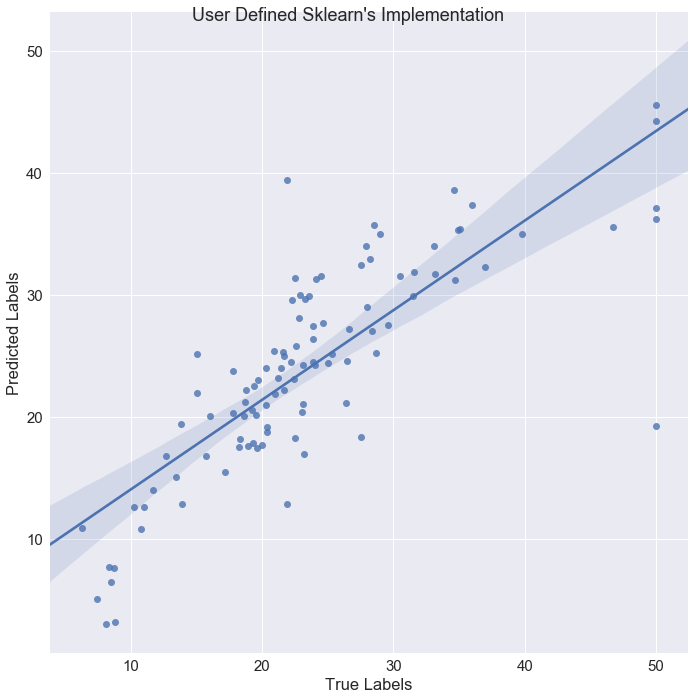

In [163]:
##References :https://stackoverflow.com/questions/46307941/how-can-i-add-title-on-seaborn-lmplot
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = dataframe_1, size = 10)
fig2 = lm2.fig 
#plt.show()
# Add a title to the Figure
fig2.suptitle("User Defined Sklearn's Implementation", fontsize=18)

sns.set(font_scale = 1.5)
plt.show()

## 2. Implementation of Sklearn SGDRegressor

In [141]:
clf = SGDRegressor(learning_rate= 'invscaling', n_iter = 4000)
clf.fit(X_train, Y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=2500, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [142]:
clf.coef_

array([-0.98992551,  1.38804383,  0.19248265,  0.77308761, -1.89304502,
        2.85895349, -0.0993226 , -3.07809766,  2.99179388, -2.54507024,
       -1.84543154,  0.82408817, -3.42192292])

In [143]:
clf.intercept_

array([22.59679561])

### 2.1 Comparison between True Labels and Predicted Labels

In [148]:
y_pred = []
for i in range(102) :
    pred = np.dot(clf.coef_, X_test[i]) + clf.intercept_[0]
    y_pred.append(pred)
y_true = []
for i in range(102) :
    y_true.append(Y_test[i])
data_2 = {'True Labels': Y_test, 'Predicted Labels': y_pred}
dataframe_2 = pd.DataFrame(data = data_2)
dataframe_2

,Predicted Labels,True Labels
0,22.836033,21.4
1,26.767931,22.6
2,28.216859,28.4
3,32.896929,33.1
4,17.585562,19.3
5,24.021204,21.7
6,32.207244,31.6
7,21.564230,18.7
8,25.173916,29.6
9,17.037449,18.6


### 2.3 Calculation of Mean Square Error

In [154]:
Mean_Sq_Error = mean_squared_error(y_true, y_pred)
print('MSE =',Mean_Sq_Error)

MSE = 20.785092418764798


### 2.4 Plot between True Labels and Predicted Labels

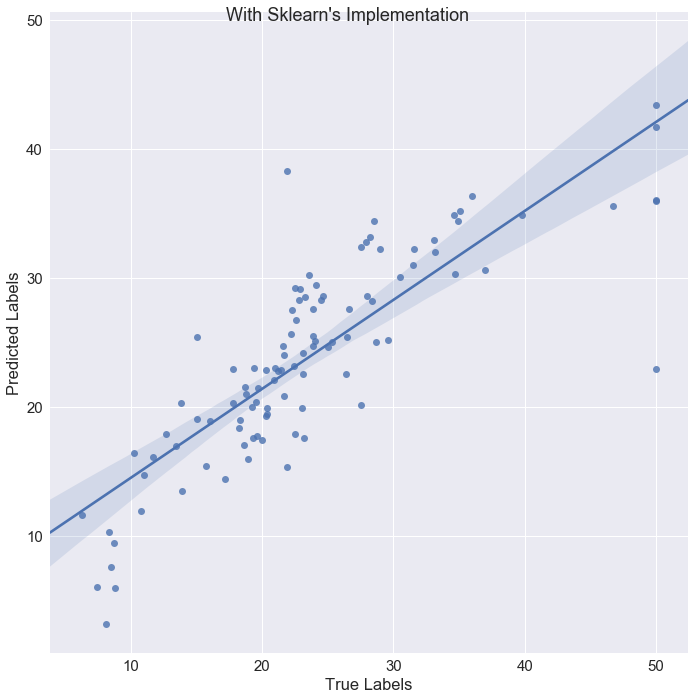

In [159]:
## References : https://stackoverflow.com/questions/46307941/how-can-i-add-title-on-seaborn-lmplot
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = dataframe_2, size = 10)

fig2 = lm2.fig 
#plt.show()
# Add a title to the Figure
fig2.suptitle("With Sklearn's Implementation", fontsize=18)

sns.set(font_scale = 1.5)
plt.show()

## 3. Comparison between Inbuilt SGDRegressor Weights and Userdefined SGDRegressor Weights

In [165]:
d2 = {'Inbuilt Sklearn Weights': clf.coef_, 'User_Defined': w}
df3 = pd.DataFrame(data = d2)
df3

,Inbuilt Sklearn Weights,User_Defined
0,-0.989926,-0.981457
1,1.388044,1.864607
2,0.192483,0.868890
3,0.773088,0.830716
4,-1.893045,-1.237634
5,2.858953,3.545752
6,-0.099323,-0.021903
7,-3.078098,-1.822441
8,2.991794,2.641509
9,-2.545070,-2.921287


## Conclusion

**Userdefined Regressor MSE = 21.062**<br>
**Inbuilt Regressor MSE = 20.78**

## Algorithm Followed :

1) Initialize weights with random values from uniform distribution.<br>
2) Initialize bias with random values from uniform distribution.<br>
3) Run the loop for n_iter iterations.<br>
4) In each iteration, take 10 random samples from train data which is known as the batch size.<br>
5) Then we update the weights and bias using the following formula :<br>
 w_new = w_old - (-2 \* x[i]\*(y[i] - w_old.T\*x[i] - b))<br>
 b_new = b_old - (-2 \* (y[i] - w.T \* x[i] - b_old))<br>
where i ranges from 1 to batch size (here 10).<br>
6)  Using the final weight vector and bias value we predict the values of y from given x (taken from test data).